In [1]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

In [ ]:
nCase = 5
nControl = 200
def generateData1(m, s, c, binary=False):
    """
    m = mean
    s = std
    c = count
    -> d : data
    """
    d = np.random.normal(m, s, c)
    if binary:
        d = np.where(d > 0.5, 1, 0)
    return d
    
def generateData2(m1, s1, c1, m2, s2, c2, binary=False):
    d1 = generateData1(m1, s1, c1, binary)
    d2 = generateData1(m2, s2, c2, binary)
    return np.concatenate([d1, d2], axis=0)

data_dict = {}
data_dict['x1'] = x1 = generateData2(57, 16, nCase, 56, 14, nControl)
data_dict['x2'] = x2 = generateData2(0.75, 0.43, nCase, 0.64, 0.47, nControl, binary=True)
data_dict['x3'] = x3 = generateData2(0.65, 0.3, nCase, 0.68, 0.39, nControl)
data_dict['y'] = y = generateData2(1, 0, nCase, 0, 0, nControl, binary=True)

test_df = pd.DataFrame(data=data_dict)
test_df['index'] = test_df.index
# import seaborn as sns
# sns.countplot(y)

test_df.to_csv('test_df.csv', index=False)

In [4]:
psm = PsmPy(test_df, treatment='y', indx='index', exclude=[])
psm.logistic_ps(balance=False)
psm.predicted_data
psm.knn_matched_12n(matcher='propensity_logit', how_many=1)
print(psm.matched_ids)
print(psm.df_matched.head())

   index  largerclass_0group
0      0                 191
1      1                 143
2      2                  96
3      3                 173
4      4                  80
   index          x1  x2        x3  propensity_score  propensity_logit  y
0      0  109.756708   1  0.364587          0.011641         -4.441549  1
1      1   65.694745   1  1.032188          0.019627         -3.911040  1
2      2   44.780968   1  0.477112          0.042390         -3.117532  1
3      3   69.711325   1  0.535503          0.024396         -3.688639  1
4      4   57.643218   0  0.814437          0.027573         -3.562975  1


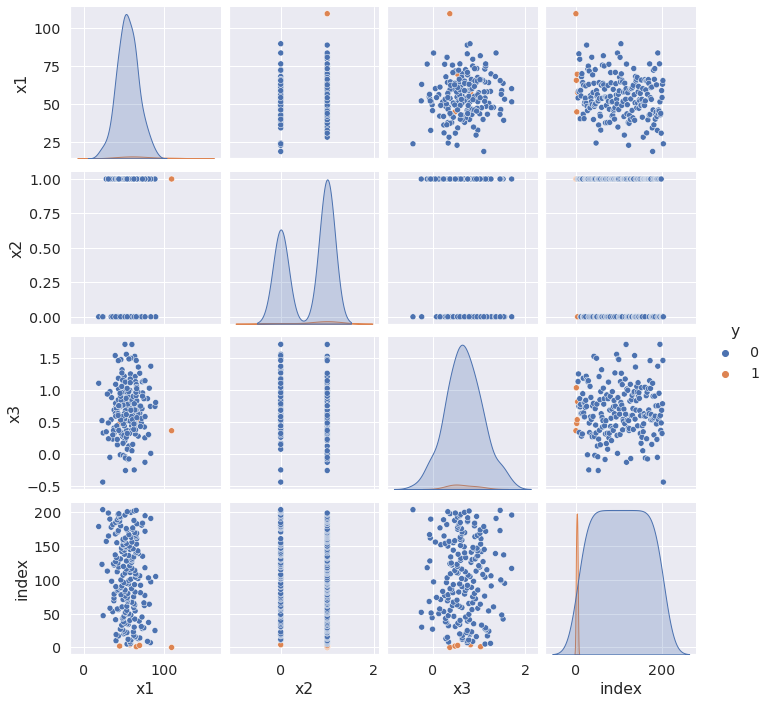

In [6]:
sns.pairplot(data=test_df,hue='y')

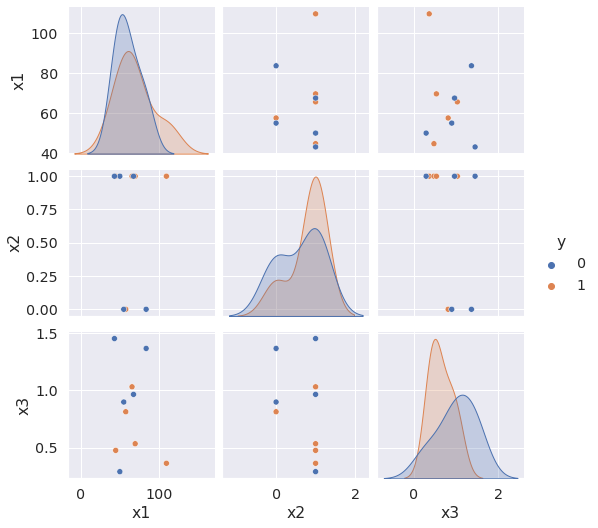

In [7]:
sns.pairplot(data=psm.df_matched[['x1', 'x2', 'x3', 'y']],hue='y')

0
1


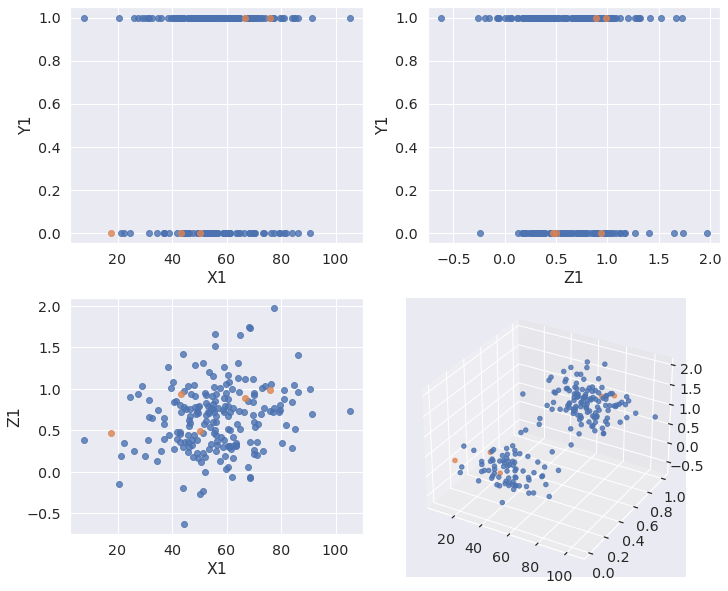

0
1


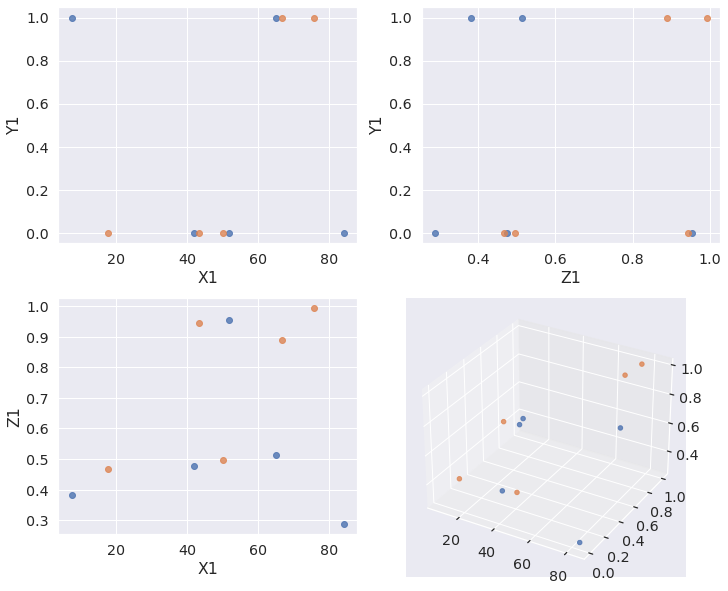

In [9]:
import matplotlib.pyplot as plt
import numpy as np
def plotscatter3Planes(df):
   fig, axes = plt.subplots(2, 2, constrained_layout=True)
   axes[1,1].remove()
   axes[1,1]=fig.add_subplot(2,2,4,projection='3d')
   axes = axes.flatten()

   for y_value, group_df in df.groupby(['y']):
      print(y_value)
      pts = {
         'X1': group_df.x1.values,
         'Y1': group_df.x2.values,
         'Z1': group_df.x3.values
      }
      for ax, (k1, k2) in zip(axes.flatten()[0:3], [('X1', 'Y1'), ('Z1', 'Y1'), ('X1', 'Z1')]):
         ax.scatter(pts[k1], pts[k2], alpha=0.8)
         ax.set_xlabel(k1)
         ax.set_ylabel(k2)
      
      axes[3].scatter(pts['X1'], pts['Y1'], pts['Z1'], alpha=0.8)

   # axes[0].sharey(axes[1])
   # axes[0].sharex(axes[2])
   # axes[2].sharey(axes[3])
   # axes[2].sharex(axes[0])

   plt.show()
plotscatter3Planes(test_df)
plotscatter3Planes(psm.df_matched)

In [ ]:
def plotscatter3d(df):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax = fig.gca(projection='3d')
    for y_value, group_df in df.groupby(['y']):
        print(y_value)
        x1 = group_df.x1.values
        x2 = group_df.x2.values
        x3 = group_df.x3.values
        ax.scatter(x1, x2, x3, alpha=0.8)
        # ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    plt.title('Matplot 3d scatter plot')
    plt.legend(loc=2)
    plt.show()

plotscatter3d(test_df)
plotscatter3d(psm.df_matched)


In [ ]:
from matplotlib import animation 
def plotscatter3dAnimate(df1, df2):
    fig, axs = plt.subplots(ncols=2, figsize=(10, 5), subplot_kw={"projection":"3d"})
    def init():
        for ax, df in zip(axs, [df1, df2]):
            for y_value, group_df in df.groupby(['y']):
                # print(y_value)
                x1 = group_df.x1.values
                x2 = group_df.x2.values
                x3 = group_df.x3.values
                ax.scatter(x1, x2, x3, alpha=0.8)
        return fig,

    def animate(i):
        axs[0].view_init(elev=30., azim=i)
        axs[1].view_init(elev=30., azim=i)
        return fig,

    # Animate
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                frames=360, interval=20, blit=True)
    # Save
    anim.save('mpl3d_scatter2.gif', fps=30)

plotscatter3dAnimate(test_df, psm.df_matched)